# Import des premières librairies

In [1]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

# Fonction Description simple du dataset :

In [2]:
def describe_dataset(source_files):

    print("Les données se décomposent en {} fichier(s): \n".format(len(source_files)))

    filenames = []
    files_nb_lines = []
    files_nb_columns = []
    nan_percent = []
    duplicate_percent = []

    for filename, file_data in source_files.items():
        filenames.append(filename)
        files_nb_lines.append(len(file_data))
        files_nb_columns.append(len(file_data.columns))
        nan_percent.append(round(file_data.isna().sum().sum()/file_data.size*100, 2))
        duplicate_percent.append(round(file_data.duplicated().sum().sum()/file_data.size*100, 2))

                           
    # On crée un dataframe spécifique :
    presentation_df = pd.DataFrame({'Nom du fichier':filenames,
                                    'Nb de lignes':files_nb_lines,
                                    'Nb de colonnes':files_nb_columns,
                                    '%NaN' :nan_percent,
                                    '%Duplicate' :duplicate_percent})

    presentation_df.index += 1

    return presentation_df

On crée une fonction pour les valeurs manquantes également :

In [3]:
def missingdata(data, name, larg, long):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    f,ax =plt.subplots(figsize=(larg,long))
    plt.xticks(rotation='90')
    fig=sns.barplot(ms.index, ms["Percent"])
    plt.xlabel('Colonnes', fontsize=15)
    plt.ylabel('% valeurs manquantes', fontsize=15)
    plt.title('Pourcentage de valeurs manquantes ('+name+')', fontsize=22, fontweight='bold')

# Chargement des différents fichiers :

In [4]:
bureau = pd.read_csv("bureau.csv")
bureau_balance = pd.read_csv("bureau_balance.csv")
credit_card_balance = pd.read_csv("credit_card_balance.csv")
installments_payments = pd.read_csv("installments_payments.csv")
POS_CASH_balance = pd.read_csv("POS_CASH_balance.csv")
previous_application = pd.read_csv("previous_application.csv")
app_test = pd.read_csv('application_test.csv')
app_train = pd.read_csv('application_train.csv')

# Premières analyses des datasets :

In [5]:
bureau.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [6]:
bureau_balance.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [7]:
# On merge les deux fichiers bureau :
bureau = bureau.merge(bureau_balance, how='left', on='SK_ID_BUREAU')

In [8]:
installments_payments.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


In [9]:
credit_card_balance.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [10]:
POS_CASH_balance.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [11]:
# Training data
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
describe_dataset({'Application Train': app_train,
                     'Application Test': app_test, 
                     'Bureau': bureau,
                     'Bureau Balance': bureau_balance,
                     'Credit Card Balance' : credit_card_balance,
                     'Installments Payments': installments_payments,
                     'POS CASH balance': POS_CASH_balance,
                     'Previous Application': previous_application})

Les données se décomposent en 8 fichier(s): 



,Nom du fichier,Nb de lignes,Nb de colonnes,%NaN,%Duplicate
1,Application Train,307511,122,24.40,0.0
2,Application Test,48744,121,23.81,0.0
3,Bureau,25121815,19,11.03,0.0
4,Bureau Balance,27299925,3,0.00,0.0
5,Credit Card Balance,3840312,23,6.65,0.0
6,Installments Payments,13605401,8,0.01,0.0
7,POS CASH balance,10001358,8,0.07,0.0
8,Previous Application,1670214,37,17.98,0.0


# TARGET

La cible est ce qu’on nous demande de prédire : soit un 0 pour le prêt a été remboursé à temps, soit un 1 indiquant que le client a eu des difficultés de paiement. Nous pouvons d’abord examiner le nombre de prêts dans chaque catégorie

In [14]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

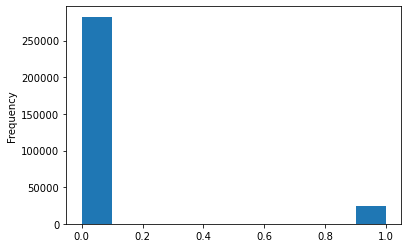

In [15]:
app_train['TARGET'].astype(int).plot.hist();

D’après ces renseignements, nous constatons qu’il s’agit d’un problème de classe sociale déséquilibrée. Il y a beaucoup plus de prêts qui ont été remboursés à temps que de prêts qui n’ont pas été remboursés. Une fois que nous entrons dans des modèles d’apprentissage automatique plus sophistiqués, nous pouvons pondérer les classes par leur représentation dans les données pour refléter ce déséquilibre.

In [16]:
# Number of each type of column
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [17]:
# Number of unique classes in each object column
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

# Valeurs manquantes 

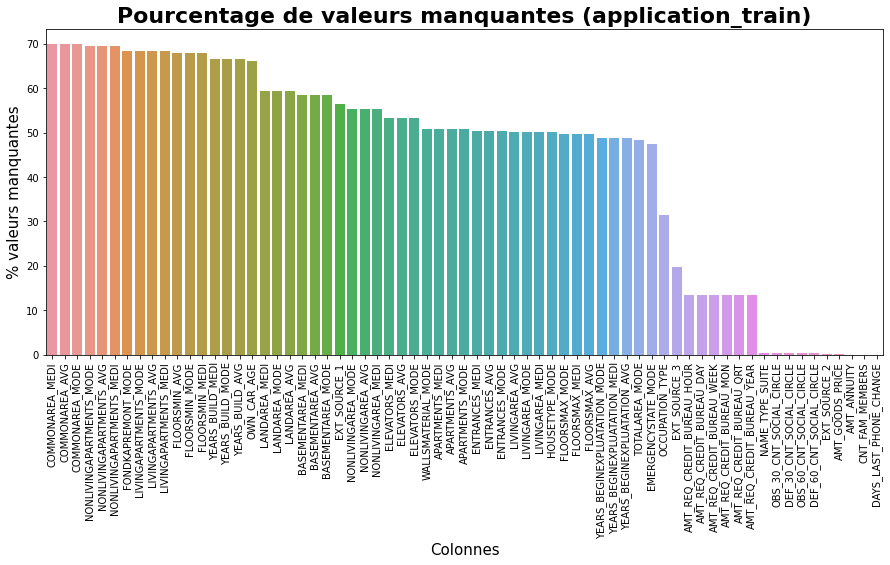

In [18]:
missingdata(app_train, "application_train", 15, 6)

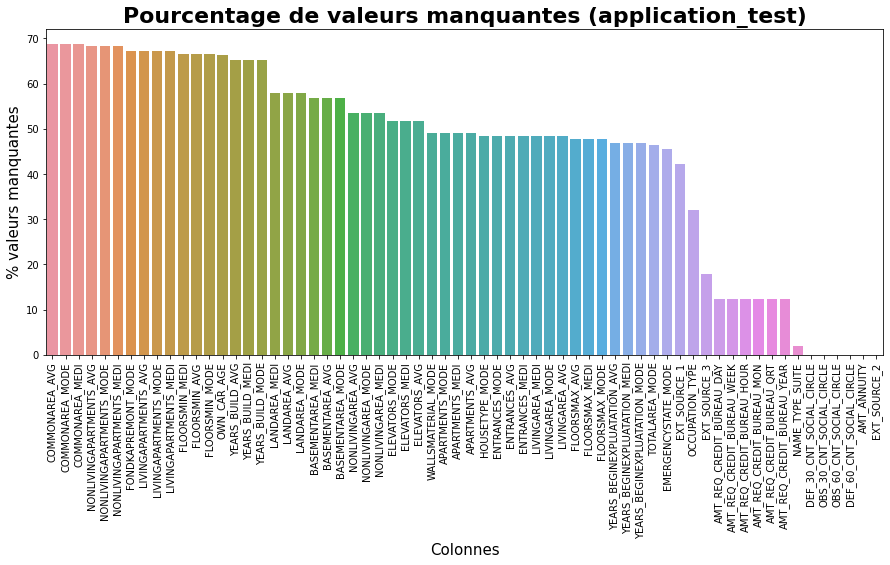

In [19]:
missingdata(app_test, "application_test", 15, 6)

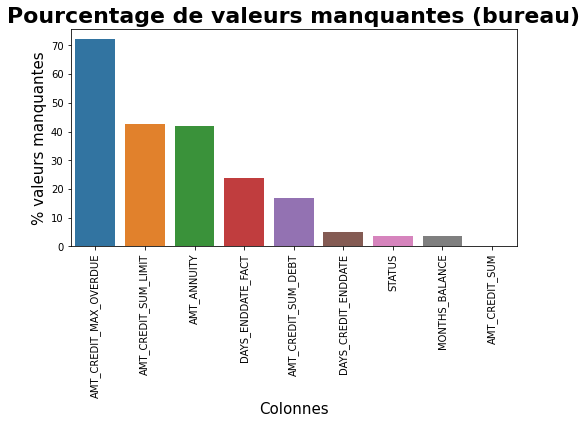

In [20]:
missingdata(bureau, "bureau", 8,4)

# Detections d'outliers

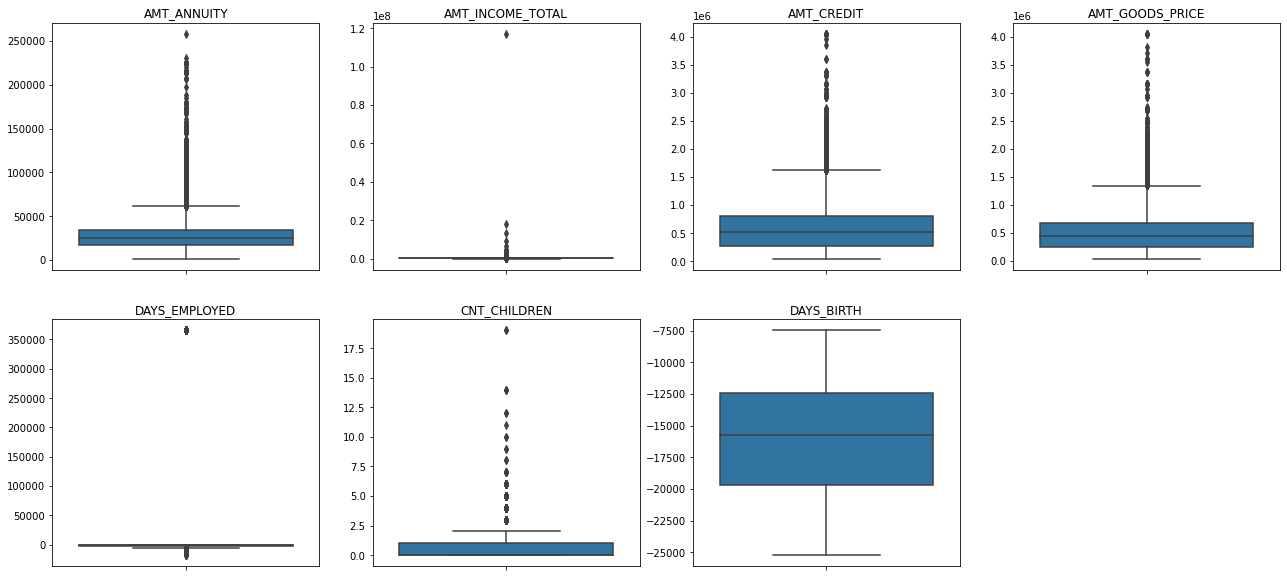

In [21]:
plt.figure(figsize=(22,10))

app_outlier_col_1 = ['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_EMPLOYED']
app_outlier_col_2 = ['CNT_CHILDREN','DAYS_BIRTH']
for i in enumerate(app_outlier_col_1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=app_train[i[1]])
    plt.title(i[1])
    plt.ylabel("")

for i in enumerate(app_outlier_col_2):
    plt.subplot(2,4,i[0]+6)
    sns.boxplot(y=app_train[i[1]])
    plt.title(i[1])
    plt.ylabel("")

In [22]:
app_train[['AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','CNT_CHILDREN','DAYS_EMPLOYED']].describe()


,AMT_ANNUITY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_BIRTH,CNT_CHILDREN,DAYS_EMPLOYED
count,307499.000000,3.075110e+05,3.075110e+05,3.072330e+05,307511.000000,307511.000000,307511.000000
mean,27108.573909,1.687979e+05,5.990260e+05,5.383962e+05,-16036.995067,0.417052,63815.045904
std,14493.737315,2.371231e+05,4.024908e+05,3.694465e+05,4363.988632,0.722121,141275.766519
min,1615.500000,2.565000e+04,4.500000e+04,4.050000e+04,-25229.000000,0.000000,-17912.000000
25%,16524.000000,1.125000e+05,2.700000e+05,2.385000e+05,-19682.000000,0.000000,-2760.000000
50%,24903.000000,1.471500e+05,5.135310e+05,4.500000e+05,-15750.000000,0.000000,-1213.000000
75%,34596.000000,2.025000e+05,8.086500e+05,6.795000e+05,-12413.000000,1.000000,-289.000000
max,258025.500000,1.170000e+08,4.050000e+06,4.050000e+06,-7489.000000,19.000000,365243.000000


AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE, CNT_CHILDREN ont un certain nombre de valeurs aberrantes.

AMT_INCOME_TOTAL a un grand nombre de valeurs aberrantes qui indiquent que quelques demandeurs de prêt ont un revenu élevé par rapport aux autres.

DAYS_BIRTH n'a pas de valeurs aberrantes, ce qui signifie que les données disponibles sont fiables.

DAYS_EMPLOYED a des valeurs aberrantes autour de 350000(jours), ce qui représente environ 958 ans, ce qui est impossible, donc c'est certainement une entrée incorrecte.

# Harmonisation des données de formation et d’essai

Il doit y avoir les mêmes caractéristiques (colonnes) dans les données de Training et de test. L’encodage à chaud a créé plus de colonnes dans les données de training parce qu’il y avait des variables catégorielles avec des catégories non représentées dans les données de test. Pour supprimer les colonnes des données de training qui ne figurent pas dans les données d’essai, nous devons harmoniser les bases de données. Tout d’abord, nous extrayons la colonne cible des données de training (parce que ce n’est pas dans les données de test, mais nous devons conserver cette information). Lorsque nous faisons l’alignement, nous devons nous assurer de définir l’axe = 1 pour aligner les dataframes en fonction des colonnes et non des lignes !

In [23]:
train_labels = app_train['TARGET']

# Aligner les données de formation et de test, ne conserver que les colonnes présentes dans les deux bases de données
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Taille Données Entrainement: ', app_train.shape)
print('Taille Données Test: ', app_test.shape)

Taille Données Entrainement:  (307511, 122)
Taille Données Test:  (48744, 121)


# Analyses univariées
Nous allons effectuer des analyses univariées afin de comprendre le comportement de tous les consommateurs en fonction de leur genre, leur age, leurs comportements, leur situation sociale...

In [24]:
app_train_c = app_train.copy()

In [25]:
def univariate_categorical(app_train_c,feature,titre,ylog=False,label_rotation=False,
                           horizontal_layout=True):
    temp = app_train_c[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = app_train_c[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc["TARGET"] = cat_perc["TARGET"]*100
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20,24))
        
    # 1. Subplot 1: Count plot of categorical column
    # sns.set_palette("Set2")
    s = sns.countplot(ax=ax1, 
                    x = feature, 
                    data=app_train_c,
                    hue ="TARGET",
                    order=cat_perc[feature],
                    palette=['g','r'])
        
    # Define common styling
    ax1.set_title(titre, fontdict={'fontsize' : 15, 'fontweight' : 'bold'}) 
    ax1.legend(['Remboursé','Défaillant'])
    
    # If the plot is not readable, use the log scale.
    if ylog:
        ax1.set_yscale('log')
        ax1.set_ylabel("Count (log)",fontdict={'fontsize' : 15, 'fontweight' : 'bold'})   
    
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    # 2. Subplot 2: Percentage of defaulters within the categorical column
    s = sns.barplot(ax=ax2, 
                    x = feature, 
                    y='TARGET', 
                    order=cat_perc[feature], 
                    data=cat_perc,
                    palette='Set2')
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Pourcentage de défaillants [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    ax2.set_title(titre+" (% Défaillants)", fontdict={'fontsize' : 15, 'fontweight' : 'bold'}) 

    plt.show();

# Par possession de vehicule ou non

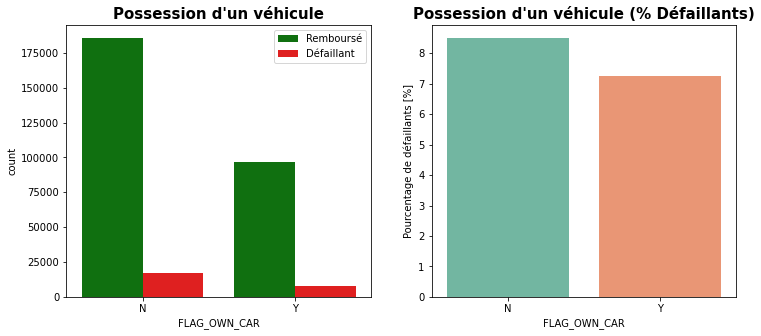

In [26]:
univariate_categorical(app_train_c, 'FLAG_OWN_CAR', "Possession d'un véhicule")

Les clients qui possèdent une voiture sont la moitié en nombre des clients qui ne possèdent pas de voiture. Mais sur la base du pourcentage de défaut, il n'y a pas de corrélation entre la possession d'une voiture et le remboursement du prêt car dans les deux cas, le pourcentage de défaut est presque le même.

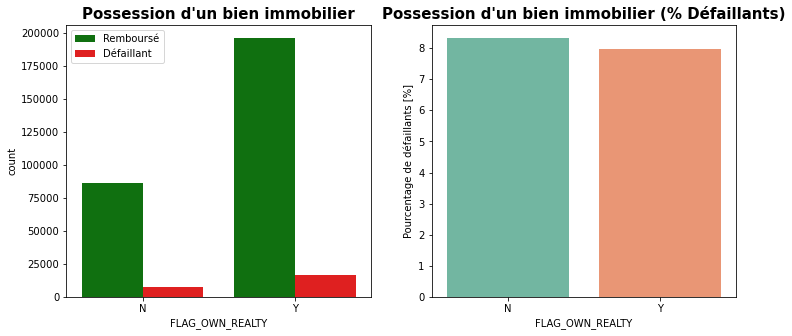

In [27]:
univariate_categorical(app_train_c, 'FLAG_OWN_REALTY', "Possession d'un bien immobilier")

Les clients qui possèdent des biens immobiliers sont plus du double de ceux qui ne sont pas propriétaires. Mais le taux de défaut des deux catégories est à peu près le même (~8%). Ainsi, il n'y a pas de corrélation entre la possession d'un bien immobilier et le défaut de paiement du prêt.

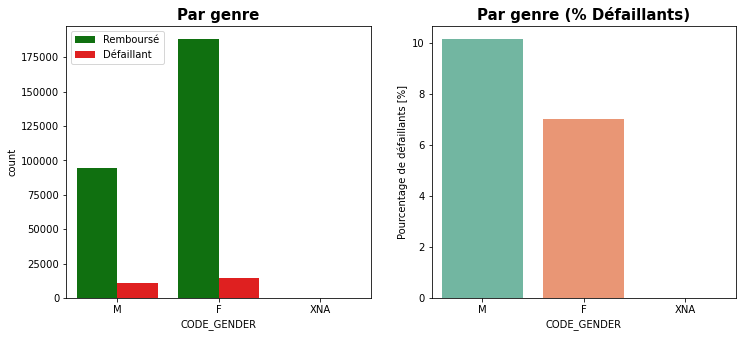

In [28]:
univariate_categorical(app_train, 'CODE_GENDER', "Par genre")

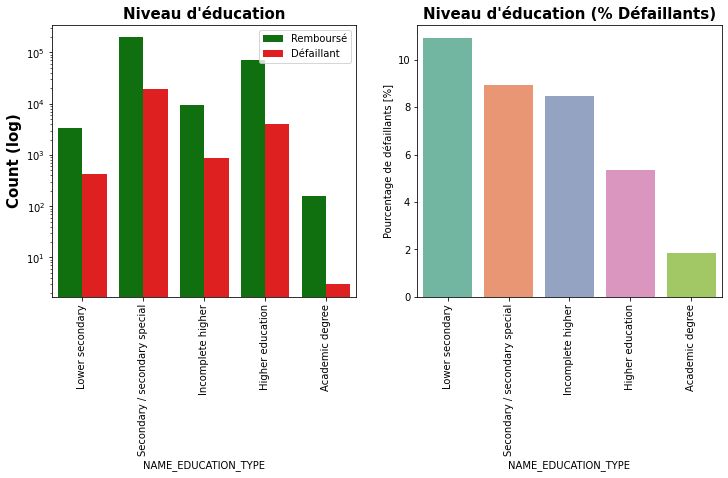

In [29]:
univariate_categorical(app_train_c, 'NAME_EDUCATION_TYPE', "Niveau d'éducation", True,True,True)

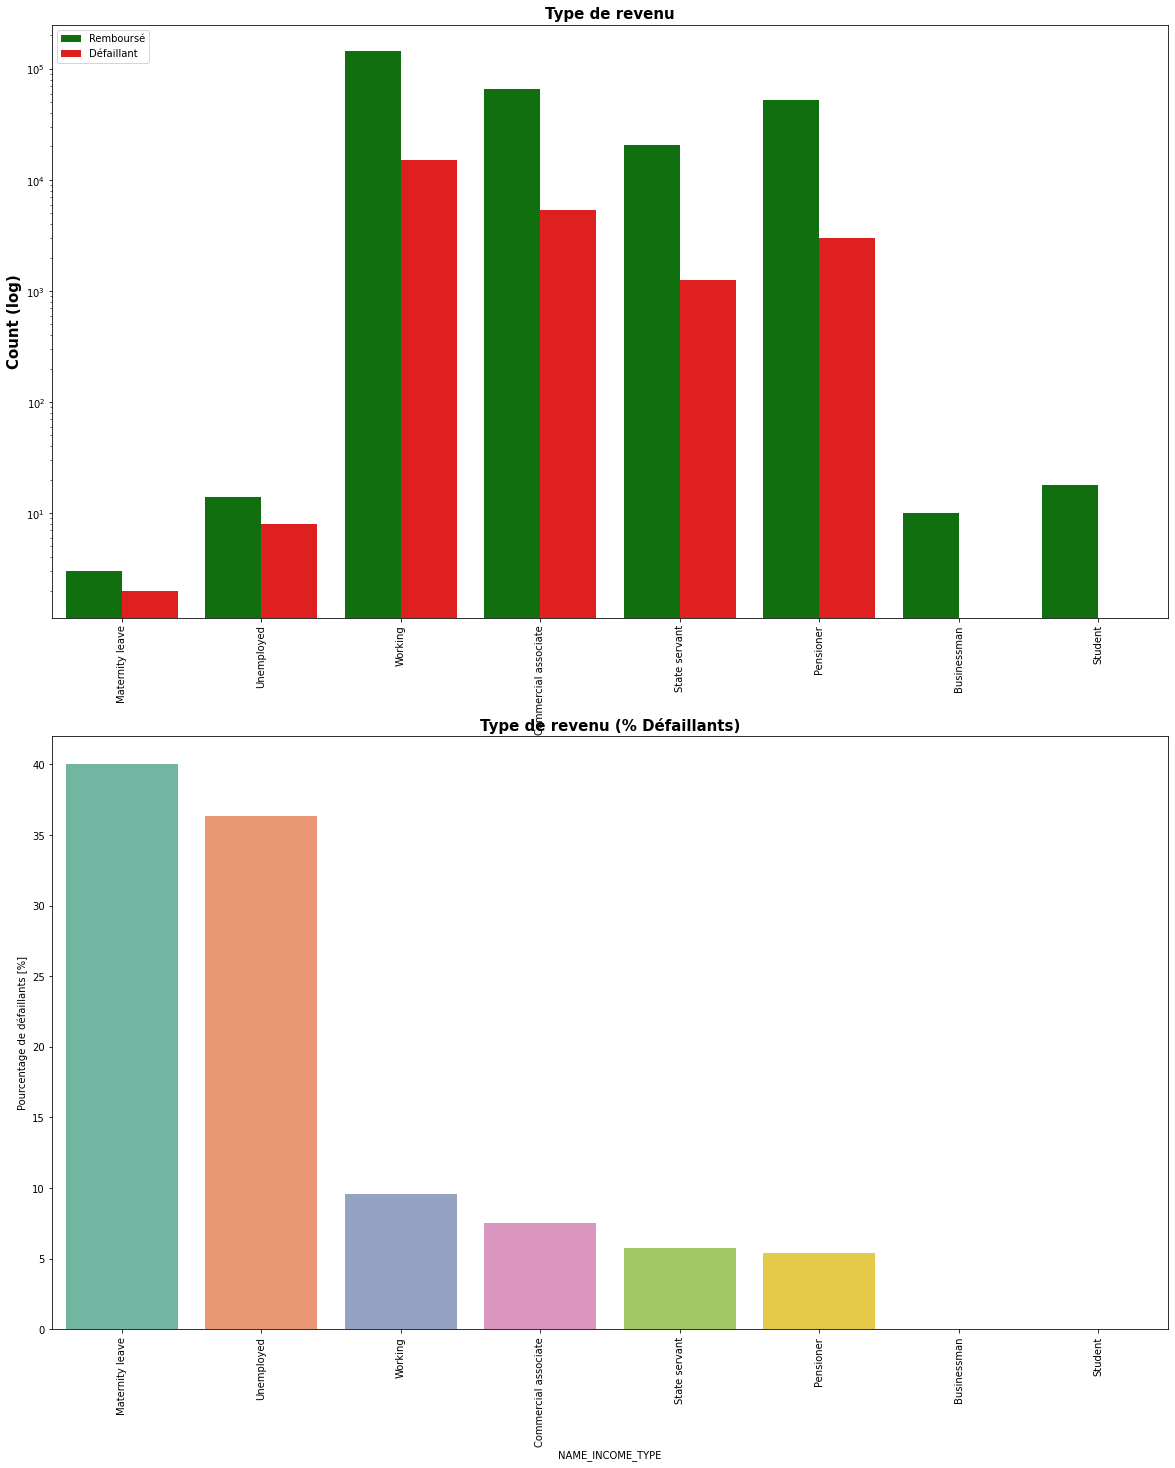

In [30]:
univariate_categorical(app_train_c, 'NAME_INCOME_TYPE', "Type de revenu", True,True,False)

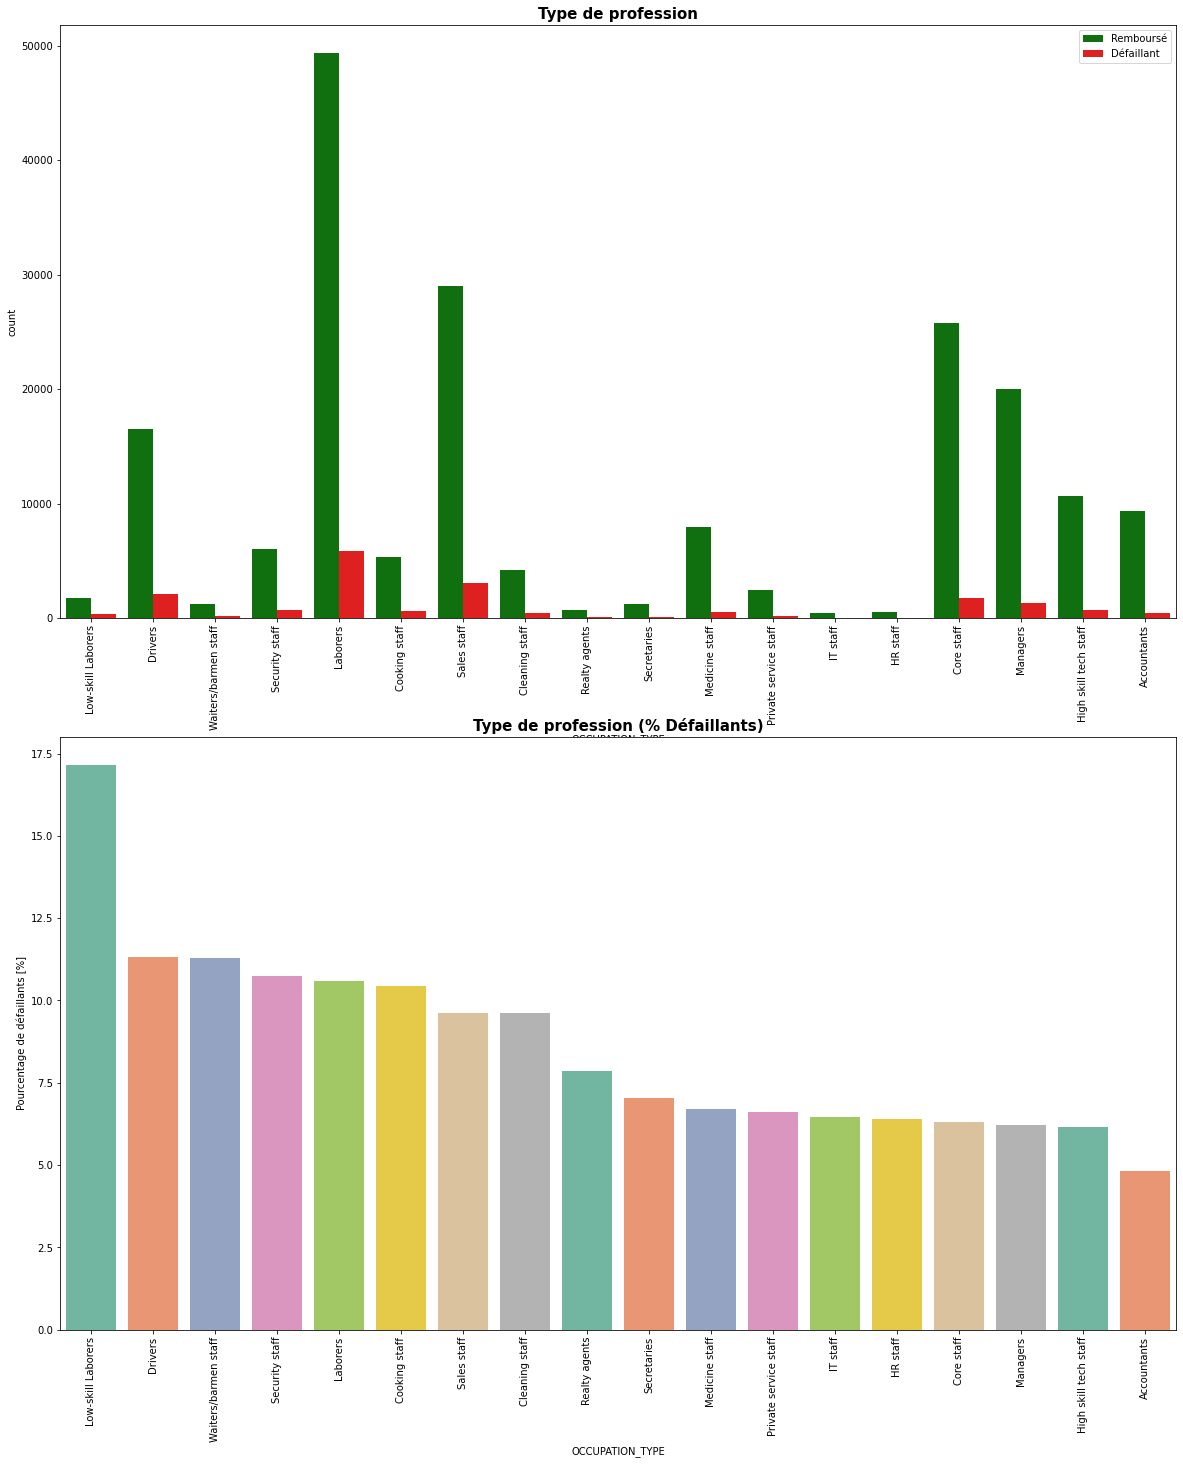

In [31]:
univariate_categorical(app_train_c, 'OCCUPATION_TYPE', "Type de profession", False,True,False)

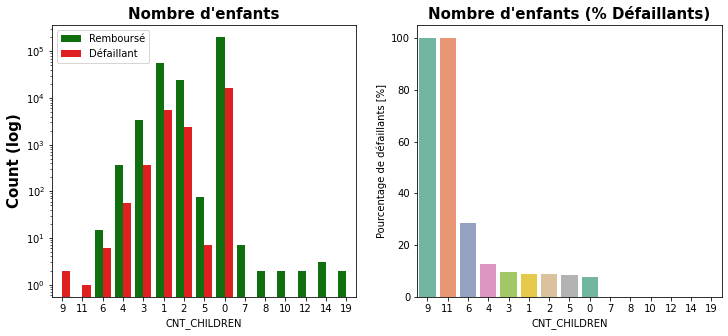

In [32]:
univariate_categorical(app_train_c, 'CNT_CHILDREN', "Nombre d'enfants", True)

La majorité des clients ont une éducation de niveau secondaire, suivis des clients avec une éducation supérieure. Un très petit nombre d'emprunteur possède un diplôme universitaire.

La catégorie du premier cycle du secondaire, bien que rare, a le taux le plus élevé de non-remboursement du prêt (11%). Les personnes ayant un diplôme universitaire ont un taux de non-remboursement inférieur à 2%.

La plupart des demandeurs de prêts ont pour type de revenu le travail, suivi par les associés commerciaux, les retraités et les fonctionnaires.
Les demandeurs ayant un revenu de type congé de maternité ont un taux de non-retour de près de 40 %, suivis par les chômeurs (37 %). Les autres types de revenus se situent en dessous de la moyenne de 10% de non remboursement des prêts.
Les étudiants et les hommes d'affaires, bien que moins nombreux, n'ont pas de cas de défaut de paiement. Ces deux catégories sont donc les plus sûres pour l'octroi de prêts.

La plupart des prêts sont contractés par des ouvriers, suivis par le personnel de vente. Les informaticiens sont ceux qui empruntent le moins.
La catégorie présentant le pourcentage le plus élevé de prêts non remboursés est celle des ouvriers peu qualifiés (plus de 17%), suivie des chauffeurs et des serveurs/barmen, du personnel de sécurité, des ouvriers et du personnel de cuisine.

La plupart des demandeurs n'ont pas d'enfants

Très peu de clients ont plus de 3 enfants.

Les clients qui ont plus de 4 enfants ont un taux de défaillance très élevé, ceux ayant 9 et 11 enfants présentant un taux de défaillance de 100%.

In [33]:
print(app_train.columns.tolist())

['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG

# Age

In [34]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [35]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

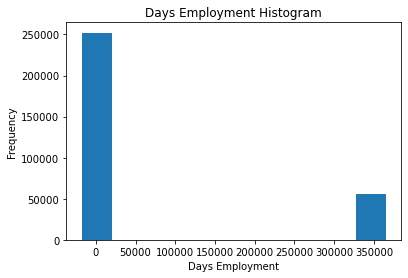

In [36]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [37]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('Pas d anomalies sur %0.2f%% des prêts' % (100 * non_anom['TARGET'].mean()))
print('Anomalies sur %0.2f%% des prêts' % (100 * anom['TARGET'].mean()))
print('Il y a  %d jours d’emploi anormaux' % len(anom))

Pas d anomalies sur 8.66% des prêts
Anomalies sur 5.40% des prêts
Il y a  55374 jours d’emploi anormaux


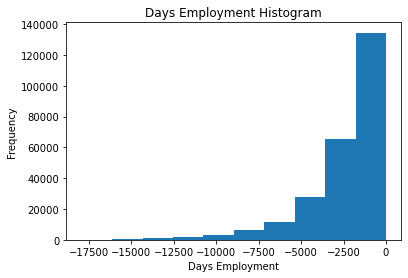

In [38]:
# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [39]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('Il y a %d anomalies dans le dataset test sur %d entrées' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

Il y a 9274 anomalies dans le dataset test sur 48744 entrées


Avant d’aller plus loin, nous devons nous occuper des variables catégoriques embêtantes. Un modèle d’apprentissage automatique ne peut malheureusement pas traiter de variables catégorielles (sauf pour certains modèles tels que LightGBM). Par conséquent, nous devons trouver un moyen d’encoder (représenter) ces variables sous forme de nombres avant de les remettre au modèle. Il y a deux façons principales de procéder :
Encodage d’étiquette : assigner chaque catégorie unique dans une variable catégorique avec un entier. Aucune nouvelle colonne n’est créée. Un exemple est montré ci-dessous
Encodage à chaud : créer une nouvelle colonne pour chaque catégorie unique dans une variable catégorique. Chaque observation reçoit un 1 dans la colonne pour sa catégorie correspondante et un 0 dans toutes les autres nouvelles colonnes.

In [40]:
# On crée un objet labelencoder
le = LabelEncoder()
le_count = 0

# On itère sur les colonnes
for col in app_train:
    if app_train[col].dtype == 'object':
        # Si 2 ou moins de categories
        if len(list(app_train[col].unique())) <= 2:
            # On effectue l'entrainement
            le.fit(app_train[col])
            # On transforme le training et le testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # On garde une trace du nombre de colonnes qui ont été label encoded :
            le_count += 1
            
print('%d colonnes ont été encodées.' % le_count)

3 colonnes ont été encodées.


# Encodage avec get_dummies

In [41]:
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Taille Données Entrainement : ', app_train.shape)
print('Taille Données Test: ', app_test.shape)

Taille Données Entrainement :  (307511, 244)
Taille Données Test:  (48744, 240)


# Correlations

In [42]:
cor=app_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', cor.tail(15))
print('\nMost Negative Correlations:\n', cor.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

# Corrélation entre age et cible

On trouve la corrélation des jours positifs depuis la naissance et la TARGET :

In [43]:
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982712

On trace la distribution des ages en années

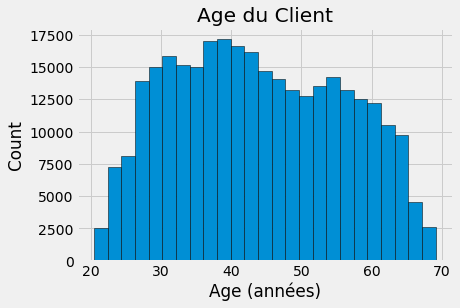

In [44]:
plt.style.use('fivethirtyeight')
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age du Client'); plt.xlabel('Age (années)'); plt.ylabel('Count');

On trace le Diagramme KDE des prêts qui ont été remboursés à temps, et des prêts non remboursés à temps :

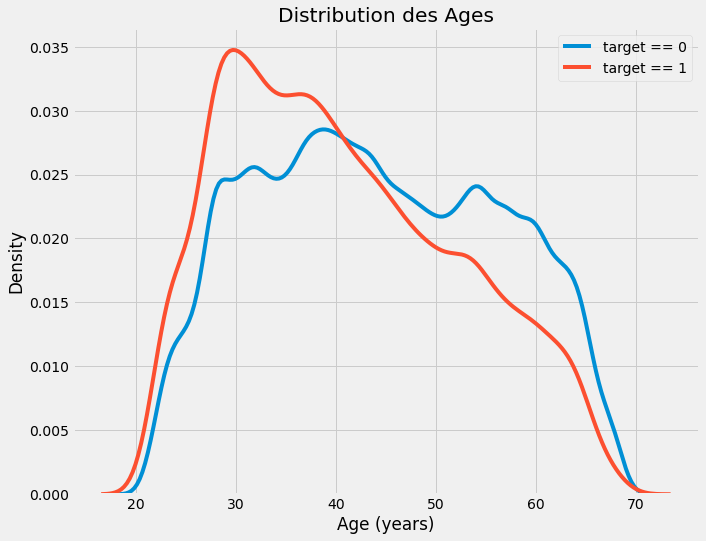

In [45]:
plt.figure(figsize = (10, 8))

# A temps:
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# Pas à temps :
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')
plt.legend()
# Labeling :
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution des Ages');

On met les informations sur l'âge dans une base de données séparée et on effectue le "bin" du age_data :

In [46]:
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin le age data
age_data['TRANCHE_ANNEES'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,TRANCHE_ANNEES
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


On crée des groupes et on calcule la moyenne, puis on trace le graphique correspondant :

In [47]:
age_groups  = age_data.groupby('TRANCHE_ANNEES').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
TRANCHE_ANNEES,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


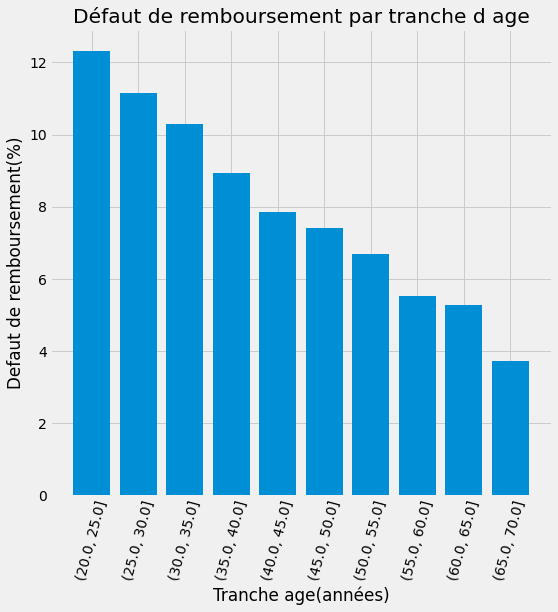

In [48]:
plt.figure(figsize = (8, 8))
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])
plt.xticks(rotation = 75); plt.xlabel('Tranche age(années)'); plt.ylabel('Defaut de remboursement(%)')
plt.title('Défaut de remboursement par tranche d age');

On extrait les variables EXT_SOURCE et on montre les différentes correlations

In [49]:
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


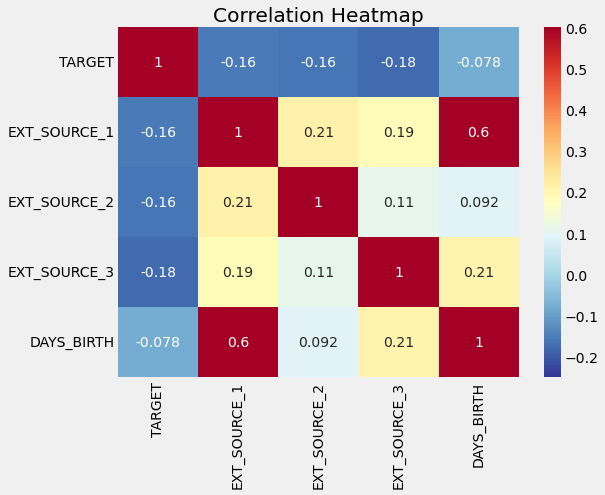

In [50]:
plt.figure(figsize = (8, 6))

# Heatmap des correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

Les trois caractéristiques EXT_SOURCE ont des corrélations négatives avec la cible, ce qui indique que plus la valeur de la EXT_SOURCE augmente, plus le client est susceptible de rembourser le prêt. Nous pouvons également voir que DAYS_BIRTH est positivement corrélé avec EXT_SOURCE_1, ce qui indique que l'un des facteurs de ce score est peut-être l'âge du client.

Ensuite, nous pouvons examiner la distribution de chacune de ces caractéristiques colorées par la valeur de la cible. Cela nous permettra de visualiser l'effet de cette variable sur la cible.

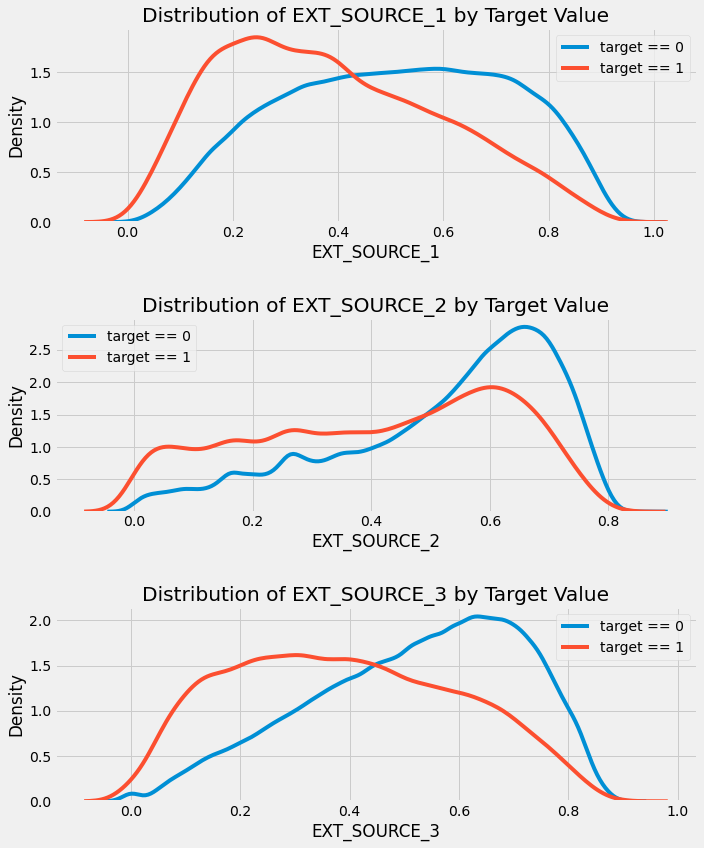

In [51]:
plt.figure(figsize = (10, 12))

# On parcourt les différentes ext_source :
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # On crée un nouveau subplot pour chaque source :
    plt.subplot(3, 1, i + 1)
    # On effectue le plot des prêts remboursés :
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    # On effectue le plot des prêts non remborusés :
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Labels
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    plt.legend()
    
plt.tight_layout(h_pad = 2.5)

EXT_SOURCE_3 affiche la plus grande différence entre les valeurs de la cible. Nous pouvons clairement voir que cette caractéristique a une certaine relation avec la probabilité qu'un demandeur rembourse un prêt. La relation n'est pas très forte. En fait, elles sont toutes considérées comme très faibles, mais ces variables seront tout de même utiles à un modèle d'apprentissage automatique pour prédire si un demandeur remboursera ou non un prêt à temps

# Features engineering

Le feature engineering à venir a été inspiré du Kaggle fourni par Openclassrooms et m'a aidé à effectuer les étapes suivantes.
Les idées clés suivantes ont été utilisées :
Diviser ou soustraire les caractéristiques importantes pour obtenir les taux (comme la rente et le revenu)
Dans Bureau Data : créer des fonctionnalités spécifiques pour les crédits actifs et les crédits fermés
Dans les demandes précédentes : créer des caractéristiques particulières pour les demandes approuvées et refusées
Modularité : une fonction par table (sauf bureau_balance et application_test)
Encodage à chaud pour les caractéristiques catégorielles
Toutes les tables sont jointes à l’application DF en utilisant la touche SK_ID_CURR (sauf bureau_balance).

In [52]:
import numpy as np
import pandas as pd
import gc
import time
from contextlib import contextmanager
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# One-hot encoding des colonnes catégorielles avec get_dummies
def one_hot_encoder(df, nan_as_category = True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(title, time.time() - t0))
#------------------------------------------    

# Preprocess application_train.csv and application_test.csv
def application_train_test(num_rows = None, nan_as_category = False):
    # Read data and merge
    df = pd.read_csv('application_train.csv', nrows= num_rows)
    test_df = pd.read_csv('application_test.csv', nrows= num_rows)
    print("Train samples: {}, test samples: {}".format(len(df), len(test_df)))
    df = df.append(test_df).reset_index()
    # On enlève 4 applications avec XNA CODE_GENDER (train set)
    df = df[df['CODE_GENDER'] != 'XNA']
    
    # Les features catégorielles avec l'encodage 0 ou 1 
    for bin_feature in ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']:
        df[bin_feature], uniques = pd.factorize(df[bin_feature])
    # Les features catégorielles avec l'encodage One-Hot
    df, cat_cols = one_hot_encoder(df, nan_as_category)
    
    # Les valeurs NaN pour la colonne Days employed: 365.243 -> nan
    df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace= True)
    # Some simple new features (percentages)
    df['DAYS_EMPLOYED_PERC'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
    df['INCOME_CREDIT_PERC'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']
    df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
    df['ANNUITY_INCOME_PERC'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
    df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']
    del test_df
    gc.collect()
    return df

#------------------------------------------

# Preprocess bureau.csv and bureau_balance.csv
def bureau_and_balance(data, num_rows = None, nan_as_category = True):
    bureau = pd.read_csv('bureau.csv', nrows = num_rows)
    bb = pd.read_csv('bureau_balance.csv', nrows = num_rows)
    bb, bb_cat = one_hot_encoder(bb, nan_as_category)
    bureau, bureau_cat = one_hot_encoder(bureau, nan_as_category)
    
    # Bureau balance et bureau :
    bb_aggregations = {'MONTHS_BALANCE': ['min', 'max', 'size']}
    for col in bb_cat:
        bb_aggregations[col] = ['mean']
    bb_agg = bb.groupby('SK_ID_BUREAU').agg(bb_aggregations)
    bb_agg.columns = pd.Index([e[0] + "_" + e[1].upper() for e in bb_agg.columns.tolist()])
    bureau = bureau.join(bb_agg, how='left', on='SK_ID_BUREAU')
    bureau.drop(['SK_ID_BUREAU'], axis=1, inplace= True)
    del bb, bb_agg
    gc.collect()
    
    # Bureau and bureau_balance - features numériques
    num_aggregations = {
        'DAYS_CREDIT': ['min', 'max', 'mean', 'var'],
        'DAYS_CREDIT_ENDDATE': ['min', 'max', 'mean'],
        'DAYS_CREDIT_UPDATE': ['mean'],
        'CREDIT_DAY_OVERDUE': ['max', 'mean'],
        'AMT_CREDIT_MAX_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_DEBT': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM_LIMIT': ['mean', 'sum'],
        'AMT_ANNUITY': ['max', 'mean'],
        'CNT_CREDIT_PROLONG': ['sum'],
        'MONTHS_BALANCE_MIN': ['min'],
        'MONTHS_BALANCE_MAX': ['max'],
        'MONTHS_BALANCE_SIZE': ['mean', 'sum']
    }
    # Bureau et bureau_balance categorical features
    cat_aggregations = {}
    for cat in bureau_cat: cat_aggregations[cat] = ['mean']
    for cat in bb_cat: cat_aggregations[cat + "_MEAN"] = ['mean']
    
    bureau_agg = bureau.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
    bureau_agg.columns = pd.Index(['BURO_' + e[0] + "_" + e[1].upper() for e in bureau_agg.columns.tolist()])
    # Bureau: Active credits - using only numerical aggregations
    active = bureau[bureau['CREDIT_ACTIVE_Active'] == 1]
    active_agg = active.groupby('SK_ID_CURR').agg(num_aggregations)
    active_agg.columns = pd.Index(['ACTIVE_' + e[0] + "_" + e[1].upper() for e in active_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(active_agg, how='left', on='SK_ID_CURR')
    del active, active_agg
    gc.collect()
    # Bureau: Closed credits - using only numerical aggregations
    closed = bureau[bureau['CREDIT_ACTIVE_Closed'] == 1]
    closed_agg = closed.groupby('SK_ID_CURR').agg(num_aggregations)
    closed_agg.columns = pd.Index(['CLOSED_' + e[0] + "_" + e[1].upper() for e in closed_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(closed_agg, how='left', on='SK_ID_CURR')
    del closed, closed_agg, bureau
    gc.collect()
    return bureau_agg

#------------------------------------------

# Preprocess previous_applications.csv
def previous_applications(num_rows = None, nan_as_category = True):
    prev = pd.read_csv('previous_application.csv', nrows = num_rows)
    prev, cat_cols = one_hot_encoder(prev, nan_as_category= True)
    # Days 365.243 values -> nan
    prev['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace= True)
    prev['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace= True)
    prev['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace= True)
    prev['DAYS_LAST_DUE'].replace(365243, np.nan, inplace= True)
    prev['DAYS_TERMINATION'].replace(365243, np.nan, inplace= True)
    # Ajout de feature: value ask / value received percentage
    prev['APP_CREDIT_PERC'] = prev['AMT_APPLICATION'] / prev['AMT_CREDIT']
    # Previous applications numeric features
    num_aggregations = {
        'AMT_ANNUITY': ['min', 'max', 'mean'],
        'AMT_APPLICATION': ['min', 'max', 'mean'],
        'AMT_CREDIT': ['min', 'max', 'mean'],
        'APP_CREDIT_PERC': ['min', 'max', 'mean', 'var'],
        'AMT_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'AMT_GOODS_PRICE': ['min', 'max', 'mean'],
        'HOUR_APPR_PROCESS_START': ['min', 'max', 'mean'],
        'RATE_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'DAYS_DECISION': ['min', 'max', 'mean'],
        'CNT_PAYMENT': ['mean', 'sum'],
    }
    # Previous applications categorical features
    cat_aggregations = {}
    for cat in cat_cols:
        cat_aggregations[cat] = ['mean']
    
    prev_agg = prev.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
    prev_agg.columns = pd.Index(['PREV_' + e[0] + "_" + e[1].upper() for e in prev_agg.columns.tolist()])
    # Previous Applications: Approved Applications - only numerical features
    approved = prev[prev['NAME_CONTRACT_STATUS_Approved'] == 1]
    approved_agg = approved.groupby('SK_ID_CURR').agg(num_aggregations)
    approved_agg.columns = pd.Index(['APPROVED_' + e[0] + "_" + e[1].upper() for e in approved_agg.columns.tolist()])
    prev_agg = prev_agg.join(approved_agg, how='left', on='SK_ID_CURR')
    # Previous Applications: Refused Applications - only numerical features
    refused = prev[prev['NAME_CONTRACT_STATUS_Refused'] == 1]
    refused_agg = refused.groupby('SK_ID_CURR').agg(num_aggregations)
    refused_agg.columns = pd.Index(['REFUSED_' + e[0] + "_" + e[1].upper() for e in refused_agg.columns.tolist()])
    prev_agg = prev_agg.join(refused_agg, how='left', on='SK_ID_CURR')
    del refused, refused_agg, approved, approved_agg, prev
    gc.collect()
    return prev_agg

#------------------------------------------

# Preprocess POS_CASH_balance.csv
def pos_cash(data, num_rows = None, nan_as_category = True):
    pos = pd.read_csv('POS_CASH_balance.csv', nrows = num_rows)
    pos, cat_cols = one_hot_encoder(pos, nan_as_category= True)
    # Features
    aggregations = {
        'MONTHS_BALANCE': ['max', 'mean', 'size'],
        'SK_DPD': ['max', 'mean'],
        'SK_DPD_DEF': ['max', 'mean']
    }
    for cat in cat_cols:
        aggregations[cat] = ['mean']
    
    pos_agg = pos.groupby('SK_ID_CURR').agg(aggregations)
    pos_agg.columns = pd.Index(['POS_' + e[0] + "_" + e[1].upper() for e in pos_agg.columns.tolist()])
    # Count pos cash accounts
    pos_agg['POS_COUNT'] = pos.groupby('SK_ID_CURR').size()
    del pos
    gc.collect()
    return pos_agg

#------------------------------------------

# Preprocess installments_payments.csv
def installments_payments(num_rows = None, nan_as_category = True):
    ins = pd.read_csv('installments_payments.csv', nrows = num_rows)
    ins, cat_cols = one_hot_encoder(ins, nan_as_category= True)
    # Percentage and difference paid in each installment (amount paid and installment value)
    ins['PAYMENT_PERC'] = ins['AMT_PAYMENT'] / ins['AMT_INSTALMENT']
    ins['PAYMENT_DIFF'] = ins['AMT_INSTALMENT'] - ins['AMT_PAYMENT']
    # Days past due and days before due (no negative values)
    ins['DPD'] = ins['DAYS_ENTRY_PAYMENT'] - ins['DAYS_INSTALMENT']
    ins['DBD'] = ins['DAYS_INSTALMENT'] - ins['DAYS_ENTRY_PAYMENT']
    ins['DPD'] = ins['DPD'].apply(lambda x: x if x > 0 else 0)
    ins['DBD'] = ins['DBD'].apply(lambda x: x if x > 0 else 0)
    # Features: Perform aggregations
    aggregations = {
        'NUM_INSTALMENT_VERSION': ['nunique'],
        'DPD': ['max', 'mean', 'sum'],
        'DBD': ['max', 'mean', 'sum'],
        'PAYMENT_PERC': ['max', 'mean', 'sum', 'var'],
        'PAYMENT_DIFF': ['max', 'mean', 'sum', 'var'],
        'AMT_INSTALMENT': ['max', 'mean', 'sum'],
        'AMT_PAYMENT': ['min', 'max', 'mean', 'sum'],
        'DAYS_ENTRY_PAYMENT': ['max', 'mean', 'sum']
    }
    for cat in cat_cols:
        aggregations[cat] = ['mean']
    ins_agg = ins.groupby('SK_ID_CURR').agg(aggregations)
    ins_agg.columns = pd.Index(['INSTAL_' + e[0] + "_" + e[1].upper() for e in ins_agg.columns.tolist()])
    # Count installments accounts
    ins_agg['INSTAL_COUNT'] = ins.groupby('SK_ID_CURR').size()
    del ins
    gc.collect()
    return ins_agg

#------------------------------------------

# Preprocess credit_card_balance.csv
def credit_card_balance(num_rows = None, nan_as_category = True):
    cc = pd.read_csv('credit_card_balance.csv', nrows = num_rows)
    cc, cat_cols = one_hot_encoder(cc, nan_as_category= True)
    # General aggregations
    cc.drop(['SK_ID_PREV'], axis= 1, inplace = True)
    cc_agg = cc.groupby('SK_ID_CURR').agg(['min', 'max', 'mean', 'sum', 'var'])
    cc_agg.columns = pd.Index(['CC_' + e[0] + "_" + e[1].upper() for e in cc_agg.columns.tolist()])
    # Count credit card lines
    cc_agg['CC_COUNT'] = cc.groupby('SK_ID_CURR').size()
    del cc
    gc.collect()
    return cc_agg

#------------------------------------------

#------------------------------------------
# MODELISATION
#------------------------------------------

def evaluate_model(gs, x, y, x_test, y_test, model_name, balancing_method):
    
    #Entrainement
    start = time.time()
    model = gs.fit(x,y)
    end = time.time()-start

    if (model_name != 'Baseline'):
        df_results = pd.DataFrame.from_dict(model.cv_results_)

    #Training Performance
    if (model_name == 'Baseline'):
        #y_pred = model.predict(x)
        y_proba = model.predict_proba(x)

        auc_train = round(roc_auc_score(y, y_proba[:,1]),3) 
        #f2_train = round(fbeta_score(y, y_pred, beta=2), 3)
    else:
        auc_train = round(model.best_score_,3) 
        #f2_train = round(np.mean(df_results[df_results.rank_test_F2 == 1]['mean_test_F2']),3)

    #Testing Performance
    #y_pred = model.predict(x_test)
    y_proba = model.predict_proba(x_test)
    auc_test = round(roc_auc_score(y_test, y_proba[:,1]),3) 
    #f2_test = round(fbeta_score(y_test, y_pred, beta=2), 3)

    row = [model_name, 
            balancing_method,
            auc_train, 
            auc_test,
            #f2_train,
            #f2_test,
            end]

    return row

#------------------------------------------

def evaluate_model2(model, x, y, x_test, y_test, folds=5, loss_func=None):
    '''
        Uses cross-validation to determine the score of a model 
        on train data, then calculates the score on test data.
    
        Parameters
        --------
        - model     : a machine learning model
        - x         : pandas dataframe
                      The training features
        - y         : pandas dataframe
                      The training labels
        - x_test    : pandas dataframe
                      The test features
        - y_test    : pandas dataframe
                      The test labels
        - scoring   : Cost function
                      The cost function to use for scoring
        - folds     : int
                      The number of folds to use for the cross-validation
        - loss_func : Loss function
                      The loss function to use for the algorithms that allow
                      custom loss functions
            
        Returns
        --------
        -, -, -, - : tuple
                     - The training custom scores for each fold (array)
                     - The custom score for the test data (float)
                     - The training ROC AUC scores for each fold (array)
                     - The ROC AUC score for the test data (float)
    '''

    #cv_custom_scores = []
    cv_auc_scores = []
    cv_f2_scores = []

    y_pred_proba = []

    # create folds
    kf = StratifiedKFold(n_splits=folds)
    
    for train_indices, valid_indices in kf.split(x, y):
        # Training data for the fold
        xtrn, ytrn = x.iloc[train_indices], y.iloc[train_indices]
        # Validation data for the fold
        xval, yval = x.iloc[valid_indices], y.iloc[valid_indices]

        # train
        if loss_func!=None:
            model.fit(xtrn, ytrn, eval_metric = loss_func)
        else:
            model.fit(xtrn, ytrn)

        # predict values on validation set
        ypred = model.predict(xval)
        
        # save probabilities for class 1
        yprob = model.predict_proba(xval)
        y_pred_proba+=(list(yprob[:,1]))

        # calculate and save scores
        auc_score = round(roc_auc_score(yval, ypred), 3)
        cv_auc_scores.append(auc_score)

        f2_score = round(fbeta_score(yval, ypred, beta=2), 3)
        cv_f2_scores.append(f2_score)
        
        #custom_score = round(scoring(yval, ypred), 3)
        #cv_custom_scores.append(custom_score)

    if loss_func!=None:
        model.fit(x, y, eval_metric=loss_func)
        y_pred = model.predict(x_test)
    else:
        model.fit(x, y)
        y_pred = model.predict(x_test)

    auc_score_test = round(roc_auc_score(y_test, y_pred), 3)
    
    f2_score_test = round(fbeta_score(y_test, y_pred, beta=2), 3)

    #custom_score_test = round(scoring(y_test, y_pred), 3)

    return np.array(cv_f2_scores), \
           f2_score_test, \
           np.array(cv_auc_scores), \
           auc_score_test

#------------------------------------------

def plotComparaisonResults(metrics_compare, metric):
    
    fig, ax = plt.subplots()
    
    # create data
    x = np.arange(4)
    y1 = metrics_compare [metrics_compare['Balancing_method'] == "Undersampling"] [metric]
    y2 = metrics_compare [metrics_compare['Balancing_method'] == "Oversampling"] [metric]
    y3 = metrics_compare [metrics_compare['Balancing_method'] == "Balanced"] [metric]
    width = 0.2

    # plot data in grouped manner of bar type
    b1 = plt.bar(x-0.2, y1, width)
    b2 = plt.bar(x, y2, width)
    b3 = plt.bar(x+0.2, y3, width)
    plt.xticks(x, ['Baseline','LinearRegression', 'RandomForest', 'LGBM'])
    
    #if (metric =="F2"):
    #    plt.title('F2-score des modèles (train)')
    
    #if(metric =="F2_test"):
    #    plt.title('F2-score des modèles (test)')

    if (metric =="AUC"):
        plt.title('AUC des modèles (train)')
    
    if(metric =="AUC_test"):
        plt.title('AUC des modèles (test)')
        
    #if (metric =="F2" or metric =="F2_test"):    
     #   plt.ylabel("F2-score")
    if (metric =="Time"):
        plt.ylabel("Time (sec)")
        plt.title("Temps d'exécution du fit")    
    else:
        plt.ylabel("AUC score")
    plt.legend(["Undersampling", "Oversampling", "Balanced"], loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
#------------------------------------------


def cf_matrix_roc_auc(model, y_true, y_pred, y_pred_proba, roc_auc, title):
    '''This function will make a pretty plot of 
  an sklearn Confusion Matrix using a Seaborn heatmap visualization + ROC Curve.'''
    fig = plt.figure(figsize=(20,15))
  
    plt.subplot(221)
    cf_matrix = confusion_matrix(y_true, y_pred)
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
  
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

    plt.subplot(222)
    fpr,tpr,_ = roc_curve(y_true, y_pred_proba)
    plt.plot(fpr, tpr, color='orange', linewidth=5, label='AUC = %0.4f' %roc_auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()

    fig.suptitle(title, fontsize="30", fontweight="bold")
    plt.show()

In [53]:
with timer("Process application_train and application_test"):
    df = application_train_test()
    print("Application df shape:", df.shape)

Train samples: 307511, test samples: 48744
Application df shape: (356251, 248)
Process application_train and application_test - done in 10s


Je crée une fonction preprocessing préentrainé, puis créer dans la même fonction , sélectionner les variables sur lesquelles on effectue le feature engineering

In [54]:
df.shape

(356251, 248)

In [55]:
# On s'assure que les noms des colonnes sont adéquats (sans espaces)
df.columns = list(map(lambda x: str(x).replace(" ", "_").replace("-", "_").replace("_/_", "_").upper(),
                      df.columns))
import re
df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

Nous avons effectué notre feature importance (en fin de notebook et dans le 2nd notebook), et pour faciliter les calculs, les processing et le traitement des dashboard, nous allons sélectionner les features les plus importantes de notre dataset

In [56]:
features_final = ['SK_ID_CURR', 'TARGET','EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'AMT_GOODS_PRICE',
                  'PAYMENT_RATE', 'CODE_GENDER', 'AMT_CREDIT', 'DAYS_EMPLOYED', 
                  'OWN_CAR_AGE', 'NAME_EDUCATION_TYPE_HIGHER_EDUCATION', 'DAYS_BIRTH', 'NAME_FAMILY_STATUS_MARRIED',
                 'AMT_ANNUITY', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_EMPLOYED_PERC']
                 
index=df.columns.isin(features_final)

df = df[df.columns[index]]

In [57]:
# On divise en entrainement/test 
train_df = df[df['TARGET'].notnull()]
test_df = df[df['TARGET'].isnull()]

In [58]:
print("train_df shape :", train_df.shape)
print("test_df shape :", test_df.shape)

train_df shape : (307507, 17)
test_df shape : (48744, 17)


In [59]:
test_df.to_csv('test_df_2.csv')

# Modélisation

Afin de modéliser au mieux notre problème, nous allons comparer les performances de 3 algorithmes :Régression Logistique, RandomForestClassifier, Light Gradient Boosting Machine

Leurs performances vont être comparées avec la stratégie “most_frequent”, c’est-à-dire prédisant systématiquement la classe la plus fréquente.

Nous évaluerons les modèles candidats à l'aide d'une validation croisée (5 folds) et optimisation des hyperparamètres via GridSearch.

Stratégies de gestion du déséquilibre des données :
L'analyse exploratoire a permis de mettre en lumière le Le caractère déséquilibré du jeu de données : 92% des prêts ont été remboursés, contre seulement 8% de prêts non remboursés dans le jeu de données.

In [60]:
# On commence par échantilloner le dataset pour que les opérationzs prennent moins de temps :
data = train_df.sample(5000, random_state=42)

SK_ID_CURR = data.pop('SK_ID_CURR')

Nous allons pour la suite essentiellement utiliser le dataframe train_df. En effet, nous avons besoin des données où la variable TARGET en renseignée pour entrainer et tester les différents modèles.

Le jeu de données (train_df) va donc être séparé entre données d'entraînement et données de test.

L'analyse exploratoire ayant fait ressortir un important déséquilibre des classes dans TARGET, nous devons veiller à maintenir ces proportions dans nos nouveaux jeux.

In [61]:
from sklearn.model_selection import train_test_split
Y = data["TARGET"]
X = data.drop("TARGET", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    train_size=0.8, random_state=42, 
                                                    stratify=Y)

In [62]:
# On split les Training et Test data sets
data_train = data[data['TARGET'].notnull()]
data_test = data[data['TARGET'].isnull()]
data_y_train = data_train['TARGET']
data_X_train = data_train.drop('TARGET', axis =1)

In [63]:
data = data.loc[:, data.isnull().mean() < .70]

In [64]:
# On effectue l'imputer "mediane" pour les dernières valeurs manquantes
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')

In [65]:
# On fit sur le training data :
X_train[X_train==np.inf] = np.nan
imputer.fit(X_train)

SimpleImputer(strategy='median')

In [66]:
# On transforme le training data

X_test[X_test==np.inf] = np.nan

X_train_preproc = imputer.transform(X_train)
X_test_preproc = imputer.transform(X_test)

In [67]:
from sklearn.preprocessing import MinMaxScaler

# On Scale les features à 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# On continue avec le scaler
scaler.fit(X_train_preproc)
X_train_preproc = scaler.transform(X_train_preproc)
X_test_preproc = scaler.transform(X_test_preproc)

xtrain = pd.DataFrame(scaler.transform(X_train_preproc), 
                      index=X_train.index, 
                      columns=X_train.columns)

xtest = pd.DataFrame(scaler.transform(X_test_preproc), 
                     index=X_test.index, 
                     columns=X_test.columns)

# Entrainement et choix du modèle

Il s'agit d'un problème de classification binaire déséquilibrée.
Nous allons évaluer les modèles à l'aide la métrique suivante:
AUC : plus l'AUC est élevée, plus le modèle est capable de prédire les bons résultats.

3 approches sont possibles dans l'analyse :
Undersampling : supprimer des observations de la classe majoritaire afin de rééquilibrer le jeu de données (RandomUnderSampler)
Oversampling : répéter des observations de la classe minoritaire afin de rééquilibrer le jeu de données (SMOTE)
Weight_balanced : indiquer au modèle le déséquilibre afin qu'il en tienne compte directement (class-weight)
Nous allons utiliser ces 3 approches et comparer les résultats pour l'ensemble des modèles.

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [70]:
results = pd.DataFrame(columns=["Algorithme", "Méthode utilisée",
                                "AUC", "AUC_test", "Temps"])

In [71]:
#Undersampling
rus = RandomUnderSampler(random_state=6)
xtrain_us, ytrain_us = rus.fit_resample(xtrain, y_train)

#Oversampling
smote = SMOTE(random_state=6)
xtrain_os, ytrain_os = smote.fit_resample(xtrain, y_train)

Pour la suite, nous calculerons nos métriques AUC, AUC test et Temps sur les différents algorithmes et les méthodes de Balancing et les comparerons au fur et à mesure, jusqu'à obtenir un tableau final avec l'ensemble des comparaisons. Nous nous baserons sur cela pour choisir les meilleures solutions pour notre modélisation : 

# Régression logistique

In [72]:
lr = LogisticRegression()
lr_balanced = LogisticRegression(class_weight="balanced")

In [73]:
params = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 2, 10, 100]
}

gs_lr = GridSearchCV(
    lr,
    param_grid=params,
    scoring="roc_auc",
    cv=5, 
    return_train_score = True,
    n_jobs=-1
)

gs_lr_balanced = GridSearchCV(
    lr_balanced,
    param_grid=params,
    scoring="roc_auc",
    cv=5, 
    return_train_score = True,
    n_jobs=-1
)

In [74]:
row = evaluate_model(gs_lr, xtrain_us, ytrain_us, xtest, y_test, \
                        "LogisticRegression", "Undersampling")

In [75]:
results.loc[len(results)] = row
results

,Algorithme,Méthode utilisée,AUC,AUC_test,Temps
0,LogisticRegression,Undersampling,0.712,0.743,4.366403


On va maintenant tester l'oversampling sur la régression logistique : 

In [76]:
model = Pipeline([
        ('sampling', SMOTE()),
        ('clf', LogisticRegression())
    ])

params = {
    'clf__penalty': ['l1', 'l2'],
    'clf__C': [0.01, 0.1, 1, 2, 10, 100]
}

gs_lr_os = GridSearchCV(
    model,
    param_grid=params,
    scoring="roc_auc",
    cv=5, 
    return_train_score = True,
    n_jobs=-1
)

In [77]:
row = evaluate_model(gs_lr_os, xtrain_os, ytrain_os, xtest, y_test, \
                        "LogisticRegression", "Oversampling")

In [78]:
results.loc[len(results)] = row
results

,Algorithme,Méthode utilisée,AUC,AUC_test,Temps
0,LogisticRegression,Undersampling,0.712,0.743,4.366403
1,LogisticRegression,Oversampling,0.749,0.744,2.286036


# Balanced

On teste notre gs_lr_balanced avec class weight :

In [79]:
row = evaluate_model(gs_lr_balanced, xtrain, y_train, xtest, y_test, \
                        "LogisticRegression", "Balanced")

In [80]:
results.loc[len(results)] = row
results

,Algorithme,Méthode utilisée,AUC,AUC_test,Temps
0,LogisticRegression,Undersampling,0.712,0.743,4.366403
1,LogisticRegression,Oversampling,0.749,0.744,2.286036
2,LogisticRegression,Balanced,0.723,0.742,0.646966


# Random Forest

De la même manière que la régression logistique, nous effectuons notre Random Forest avec les 3 méthodes utilisees : 

In [81]:
rf = RandomForestClassifier(random_state = 42)

rf_balanced = RandomForestClassifier(random_state = 42, 
                                     class_weight="balanced")

In [82]:
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10]
}

gs_rf = GridSearchCV(
    rf,
    param_grid=params,
    scoring="roc_auc",
    cv=5, 
    return_train_score = True,
    n_jobs=-1
)

gs_rf_balanced = GridSearchCV(
    rf_balanced,
    param_grid=params,
    scoring="roc_auc",
    cv=5, 
    return_train_score = True,
    n_jobs=-1
)

# Undersampling

In [83]:
row = evaluate_model(gs_rf, xtrain_us, ytrain_us, xtest, y_test, \
                        "RandomForest", "Undersampling")

results.loc[len(results)] = row
results

,Algorithme,Méthode utilisée,AUC,AUC_test,Temps
0,LogisticRegression,Undersampling,0.712,0.743,4.366403
1,LogisticRegression,Oversampling,0.749,0.744,2.286036
2,LogisticRegression,Balanced,0.723,0.742,0.646966
3,RandomForest,Undersampling,0.717,0.724,3.772797


# Oversampling

In [84]:
model = Pipeline([
        ('sampling', SMOTE()),
        ('clf', RandomForestClassifier(random_state = 42))
    ])

params = {
    'clf__n_estimators': [50, 100, 200],
    'clf__max_depth': [5, 10]
}

gs_rf_os = GridSearchCV(
    model,
    param_grid=params,
    scoring="roc_auc",
    cv=5, 
    return_train_score = True,
    n_jobs=-1
)

In [85]:
row = evaluate_model(gs_rf_os, xtrain, y_train, xtest, y_test, \
                        "RandomForest", "Oversampling")

In [86]:
results.loc[len(results)] = row
results

,Algorithme,Méthode utilisée,AUC,AUC_test,Temps
0,LogisticRegression,Undersampling,0.712,0.743,4.366403
1,LogisticRegression,Oversampling,0.749,0.744,2.286036
2,LogisticRegression,Balanced,0.723,0.742,0.646966
3,RandomForest,Undersampling,0.717,0.724,3.772797
4,RandomForest,Oversampling,0.679,0.709,13.715789


# Balanced

In [87]:
row = evaluate_model(gs_rf_balanced, xtrain, y_train, xtest, y_test, \
                        "RandomForest", "Balanced")

In [88]:
results.loc[len(results)] = row
results

,Algorithme,Méthode utilisée,AUC,AUC_test,Temps
0,LogisticRegression,Undersampling,0.712,0.743,4.366403
1,LogisticRegression,Oversampling,0.749,0.744,2.286036
2,LogisticRegression,Balanced,0.723,0.742,0.646966
3,RandomForest,Undersampling,0.717,0.724,3.772797
4,RandomForest,Oversampling,0.679,0.709,13.715789
5,RandomForest,Balanced,0.707,0.726,8.026910


# LightGBM

De la même manière que la régression logistique et Random Forest, nous effectuons notre Random Forest avec les 3 méthodes utilisees : 

In [89]:
import lightgbm as lgb

In [90]:
lgbm = lgb.LGBMClassifier(random_state = 42, objective = 'binary')

lgbm_balanced = lgb.LGBMClassifier(random_state = 42,
                                   objective = 'binary',
                                   class_weight = 'balanced')

In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05]
}

gs_lgbm = GridSearchCV(
    lgbm,
    param_grid=params,
    scoring="roc_auc",
    cv=5, 
    return_train_score = True,
    n_jobs=-1
)

gs_lgbm_balanced = GridSearchCV(
    lgbm_balanced,
    param_grid=params,
    scoring="roc_auc",
    cv=5, 
    return_train_score = True,
    n_jobs=-1
)

# Undersampling

In [92]:
row = evaluate_model(gs_lgbm, xtrain_us, ytrain_us, xtest, y_test, \
                        "LGBM", "Undersampling")

In [93]:
results.loc[len(results)] = row
results

,Algorithme,Méthode utilisée,AUC,AUC_test,Temps
0,LogisticRegression,Undersampling,0.712,0.743,4.366403
1,LogisticRegression,Oversampling,0.749,0.744,2.286036
2,LogisticRegression,Balanced,0.723,0.742,0.646966
3,RandomForest,Undersampling,0.717,0.724,3.772797
4,RandomForest,Oversampling,0.679,0.709,13.715789
5,RandomForest,Balanced,0.707,0.726,8.026910
6,LGBM,Undersampling,0.695,0.698,3.471063


# Oversampling

In [94]:
model = Pipeline([
        ('sampling', SMOTE()),
        ('clf', lgb.LGBMClassifier(random_state = 42, objective = 'binary'))
    ])

params = {
    'clf__n_estimators': [50, 100, 200],
    'clf__learning_rate': [0.01, 0.05]
}

gs_lgbm_os = GridSearchCV(
    model,
    param_grid=params,
    scoring="roc_auc",
    cv=5, 
    return_train_score = True,
    n_jobs=-1
)

In [95]:
row = evaluate_model(gs_lgbm_os, xtrain, y_train, xtest, y_test, \
                        "LGBM", "Oversampling")

In [96]:
results.loc[len(results)] = row
results

,Algorithme,Méthode utilisée,AUC,AUC_test,Temps
0,LogisticRegression,Undersampling,0.712,0.743,4.366403
1,LogisticRegression,Oversampling,0.749,0.744,2.286036
2,LogisticRegression,Balanced,0.723,0.742,0.646966
3,RandomForest,Undersampling,0.717,0.724,3.772797
4,RandomForest,Oversampling,0.679,0.709,13.715789
5,RandomForest,Balanced,0.707,0.726,8.026910
6,LGBM,Undersampling,0.695,0.698,3.471063
7,LGBM,Oversampling,0.664,0.674,5.007932


In [97]:
row = evaluate_model(gs_lgbm_balanced, xtrain, y_train, xtest, y_test, \
                        "LGBM", "Balanced")

In [98]:
results.loc[len(results)] = row
results

,Algorithme,Méthode utilisée,AUC,AUC_test,Temps
0,LogisticRegression,Undersampling,0.712,0.743,4.366403
1,LogisticRegression,Oversampling,0.749,0.744,2.286036
2,LogisticRegression,Balanced,0.723,0.742,0.646966
3,RandomForest,Undersampling,0.717,0.724,3.772797
4,RandomForest,Oversampling,0.679,0.709,13.715789
5,RandomForest,Balanced,0.707,0.726,8.026910
6,LGBM,Undersampling,0.695,0.698,3.471063
7,LGBM,Oversampling,0.664,0.674,5.007932
8,LGBM,Balanced,0.686,0.700,3.930823


L'algorithme Light Gradient Boosting Machine associé à la stratégie de rééquilibrage consistant à indiquer "balanced" comme valeur pour "weight_class" donne les meilleurs résultats sur notre jeu de données.

In [99]:
gs_lgbm_balanced.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LGBMClassifier(class_weight='balanced',
                                      objective='binary', random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True, scoring='roc_auc')

On trace notre matrice de confusion avec les paramètres trouvés pour LGBM :

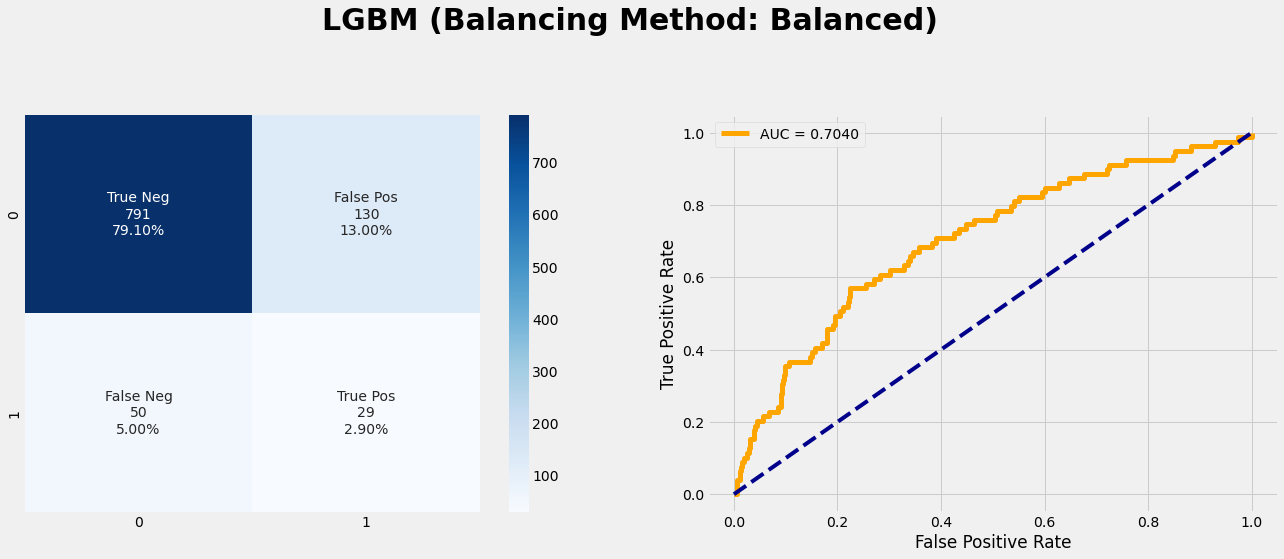

In [100]:
from sklearn.metrics import roc_auc_score, fbeta_score, roc_curve, confusion_matrix
y_proba = gs_lgbm_balanced.predict_proba(X_test)
roc_auc = round(roc_auc_score(y_test, y_proba[:,1]),3)
cf_matrix_roc_auc(gs_lgbm_balanced, y_test, gs_lgbm_balanced.predict(X_test), 
                     gs_lgbm_balanced.predict_proba(X_test)[:,1], roc_auc, "LGBM (Balancing Method: Balanced)")

# Optimisation du modèle

La problématique « métier » est de prendre en compte qu'un faux positif (bon client considéré comme mauvais = crédit non accordé à tort, donc manque à gagner de la marge pour la banque) n'a pas le même coût qu'un faux négatif (mauvais client à qui on accorde un prêt, donc perte sur le capital non remboursé). Un faux négatif est en effet 10 fois plus coûteux qu'un faux positif.

Nous allons définir une fonction métier adaptée au projet qui permet d'attribuer plus de poids à la minimisation des FN.

Ainsi nous allons à nouveau effectuer une nouvelle recherche des hyper-paramètres via HyperOpt se basant sur la fonction métier proposée, de cette façon, ils seront choisis de sorte à minimiser la perte pour l'entreprise.

Nous effectuons dans un premier temps une Fonction de coût pour minimiser le risque pour le société de prêt. Pour les paramètres choisis : y_true représente les vraies valeurs de la cible, y_pred les valeurs prédites de la cible. La fonction retourne un score de prédiction.

In [101]:
def custom_score(y_true, y_pred) :

    (TN, FP, FN, TP) = confusion_matrix(y_true, y_pred).ravel()
    N = TN + FP    # Total des cas négatifs
    P = TP + FN    # Total des cas positifs
    
    # Définir le gain et la perte de la banque pour chaque cas
    FN_value = -10   # Le prêt est accordé mais le client fait défaut : la banque perd de l'argent (erreur Type 2)
    TN_value = 1     # TLe prêt est remboursé : La banque gagne de l'argent
    TP_value = 0     # Le prêt est logiquement refusé : La banque ne gagne pas et ne perd pas d'argent 
    FP_value = -1    # Le prêt est refusé : La banque perd l'argent qu'elle aurait pu gagner, loses money it could have made, 
                     # but does not actually lose any money (Type-I Error)

    # On calcule le gain total
    gain = TP*TP_value + TN*TN_value + FP*FP_value + FN*FN_value
    
    # On calcule le best score : Toutes les observations sont correctement prédites
    best = N*TN_value + P*TP_value 

    # On calcule notre baseline : Toutes les observations sont prédites = 0
    baseline = N*TN_value + P*FN_value 
    
    # On normalise pour obtenir un score entre 0 (ligne de base) et 1
    score = (gain - baseline) / (best - baseline)
    
    return score

Après plusieurs tests avec différents hyperparamètres, nous choisissons ces hyperparamètres :

In [102]:
from sklearn.feature_selection import RFECV
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials, space_eval

#Parameter space
space = {
    'n_estimators': hp.quniform('n_estimators', 100, 600, 100),
    'learning_rate': hp.uniform('learning_rate', 0.001, 0.03),
    'max_depth': hp.quniform('max_depth', 3, 7, 1),
    'subsample': hp.uniform('subsample', 0.60, 0.95),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.60, 0.95),
    'reg_lambda': hp.uniform('reg_lambda', 1, 20)
}

Nous créons une fonction "objective", destiner à minimiser les risques. Pour cela, nous choissons "Hyperopt', qui cherchera à minimiser la perte renvoyée par cette fonction. Notre stratégie sera le StratifiedKfold appliqué 5 fois, et notre métrique d'évaluation sera soit le AUC comme lors du dernier modèle soit le "custom score" défini à l'instant.

In [103]:
def objective(params, eval_metric='custom_score'):
    #objective function to be minimized. 
    #Hyperopt will seek to minimize the loss returned by this function.
    
    params = {
        'n_estimators': int(params['n_estimators']),
        'learning_rate': params['learning_rate'],
        'max_depth': int(params['max_depth']),
        'subsample': params['subsample'],
        'colsample_bytree': params['colsample_bytree'],
        'reg_lambda': params['reg_lambda']
        }
  
    
    model= LGBMClassifier(**params)
    cv = StratifiedKFold(5)
    if eval_metric == 'roc_auc': 
        score = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv).mean()

    elif eval_metric == 'custom_score': 
        y_pred = cross_val_predict(model, X_train, y_train, method='predict', cv=cv)
        score = custom_score(y_train, y_pred)
  
    loss = 1 - score    
    return {'loss': loss, 'params': params, 'status': STATUS_OK}

In [104]:
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_predict, cross_val_score

best = fmin(fn=objective, space=space, max_evals=10, algo=tpe.suggest)

100%|████████████████████████████████████████████████| 10/10 [00:17<00:00,  1.70s/trial, best loss: 0.9898089171974522]


Sur la base de ces meilleurs paramètres, nous effectuons un fit sur ce nouveau modèle.

In [105]:
%%time
lgbm = LGBMClassifier( 
    n_estimators=int(best['n_estimators']), 
    colsample_bytree= best['colsample_bytree'],
    learning_rate= best['learning_rate'],
    max_depth= int(best['max_depth']),
    subsample= best['subsample'],
    reg_lambda= best['reg_lambda'],
    class_weight = 'balanced',)

lgbm.fit(X_train, y_train)

Wall time: 237 ms


LGBMClassifier(class_weight='balanced', colsample_bytree=0.9013402184919995,
               learning_rate=0.021384560806081716, max_depth=3,
               n_estimators=400, reg_lambda=17.435935742108338,
               subsample=0.8010788009924525)

In [106]:
roc_auc = roc_auc_score(y_test, lgbm.predict_proba(X_test)[:,1])
print('AUC : %0.6f' %roc_auc)

AUC : 0.729243


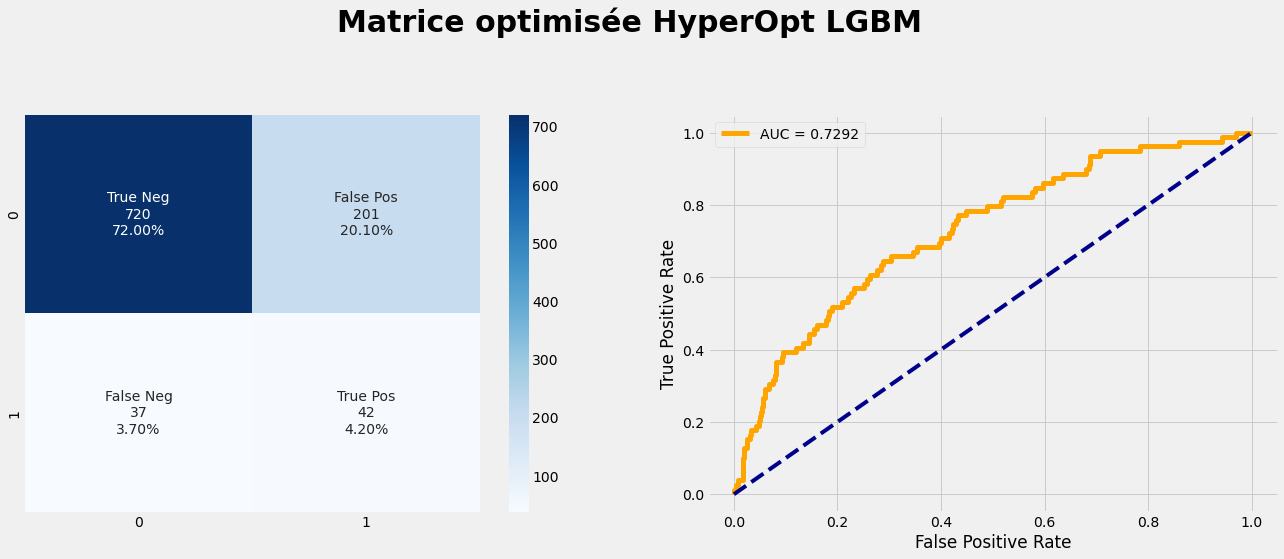

In [107]:
cf_matrix_roc_auc(lgbm, y_test, lgbm.predict(X_test), lgbm.predict_proba(X_test)[:,1],roc_auc, "Matrice optimisée HyperOpt LGBM")


In [108]:
lgbm.predict(X_test)

array([0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 0.

# Conclusion optimisation métier


On a réussi à optimiser le modèle LGBM sélectionné d'un point de vue métier avec HyperOpt.
On a un meilleur score AUC et une diminution du nombre de FN sur le jeu de test. 
On peut donc sauvegarder ce modèle avec joblib

In [109]:
import joblib
joblib.dump(lgbm,'trained_model_sample.joblib')

['trained_model_sample.joblib']

# Feature importance

Nous nous basons sur la librairie shap pour avoir les features les plus importantes de notre dataset.

In [110]:
import shap

# DF, sur la base de laquelle l'importance est vérifiée
X_importance = X_test

# On explique les prédictions du modèle à l'aide de la librairie shap : 
explainer = shap.TreeExplainer(lgbm)
shap_values = explainer.shap_values(X_importance)

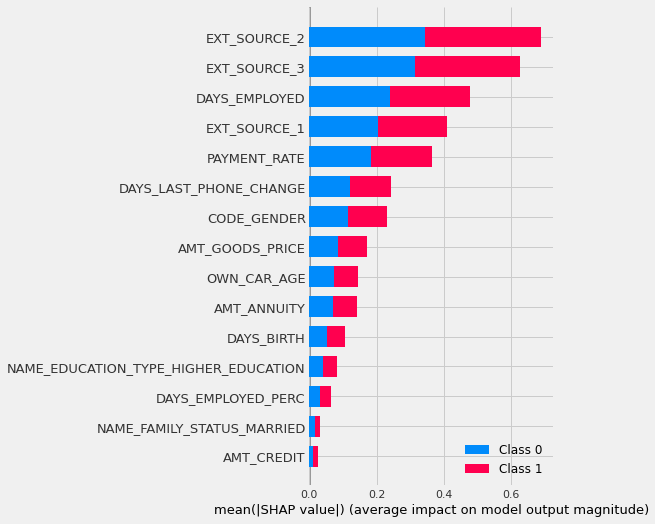

In [111]:
# On effectue un 1e plot avec ces 2 paramètres
shap.summary_plot(shap_values, X_importance)

L’importance des variables est calculée en moyennant la valeur absolue des valeurs de Shape.
On a une information supplémentaire sur l’impact de la variable en fonction de sa valeur. Par exemple AMT_GOOD_PRICES, ou PAYMENT_RATES qui est sont deux des variables les plus importantes, ont un impact négatif quand la valeur de ces variables sont élevées.

100%|===================| 3985/4000 [00:22<00:00]        

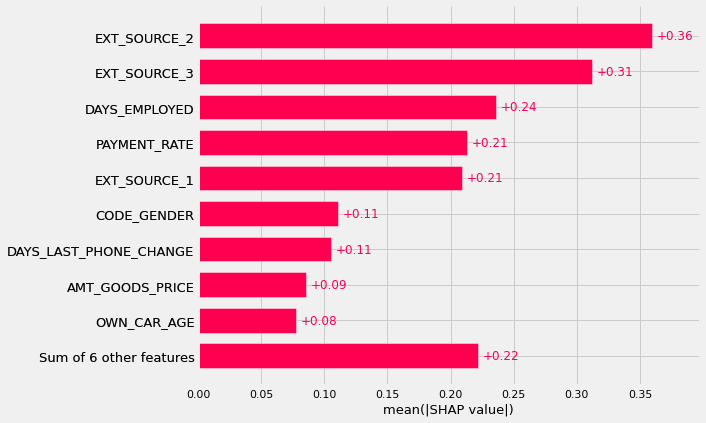

In [112]:
# compute SHAP values

explainer = shap.Explainer(lgbm, X_train)
shap_values = explainer(X_train, check_additivity=False)
shap.plots.bar(shap_values)

Les variables représentées sont celles qui ont un impact positif (contribuent à ce que la prédiction soit plus élevée que la valeur de base) J'affiche ici les critères les plus influents du modèle qui a prédit un prêt accordé ou un prêt refusé.

On sauvegarde donc ce dernier fichier par pickle, qui situe l'importance des variables et que nous pourrons interpreter lors de la mise en place du tableau de bord

In [113]:
import pickle
with open('val_file.pkl', 'wb') as f:
    pickle.dump(shap_values, f)